# Principal Component Analysis for Data Visualisation
### Example 1: Iris Dataset
### Example 2: USArrests Dataset
### Example 3: MNIST Dataset

Objectives with this notebook:
1. Perform PCA in python
2. Visualize output
3. Visualize scree plots

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# Example 1: Iris Dataset

## Load Iris Dataset

In [25]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [108]:
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [109]:
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Standardize the data

In [110]:
features = ['sepal length','sepal width','petal length','petal width']
x = df.loc[:,features].values

In [111]:
y = df.loc[:,'target'].values

In [112]:
x = StandardScaler().fit_transform(x)

In [113]:
pd.DataFrame(data=x, columns = features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


## PCA Projection to 2D

In [197]:
# Setting to 2 principal components
pca = PCA(n_components=2)

In [198]:
principalComponents = pca.fit_transform(x)

In [199]:
pcaDf = pd.DataFrame(data = principalComponents, columns =['principal component 1','principal component 2'])

In [187]:
pcaDf

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [188]:
df['target']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: target, Length: 150, dtype: object

In [189]:
finalDf = pd.concat([pcaDf,df['target']], axis=1)

In [190]:
finalDf

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


## Visualize 2D Projection

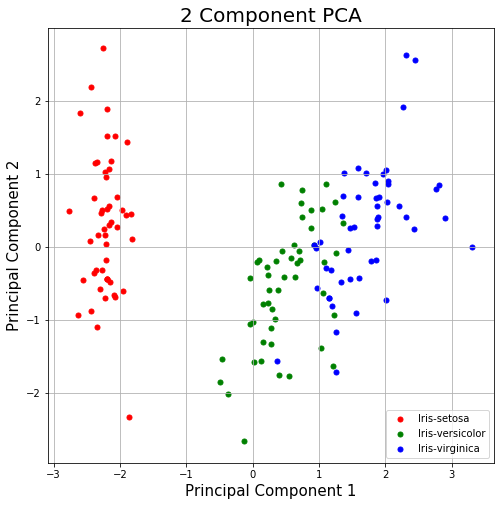

In [231]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colours = ['r','g','b']

for target, colour in zip(targets,colours):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(pcaDf.loc[indicesToKeep,'principal component 1'], 
               pcaDf.loc[indicesToKeep,'principal component 2'],
               c = colour,
               s = 25)

ax.legend(targets)
ax.grid()

# Explained Variance 

In [192]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

The first two principal components explain 95.80% of the variance in the dataset. PC1 contains 72.77% of the variance and PC2 contains 23.03% of the variance. The third and fourth principal component contained the rest of the variance of the dataset.

# Visualize Scree Plots

In [207]:
pca  = PCA()

In [209]:
principalComponents = pca.fit_transform(x)

In [210]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [226]:
var_percentage = np.round(pca.explained_variance_ratio_*100)

<BarContainer object of 4 artists>

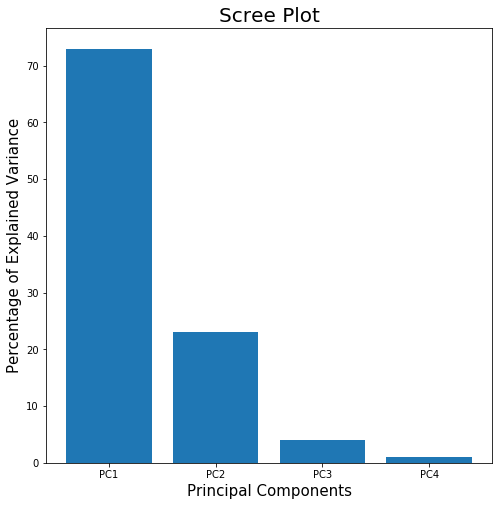

In [239]:
labels = ['PC'+ str(x) for x in range(1,len(var_percentage)+1)]

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Components', fontsize = 15)
ax.set_ylabel('Percentage of Explained Variance', fontsize = 15)
ax.set_title('Scree Plot', fontsize = 20)
ax.bar(x = range(1,len(var_percentage)+1), height=var_percentage, tick_label = labels)
